In [1]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Modeling non-linear relationship using Polynomial Regression

In [2]:
# Model to predict marks given the number of courses taken and the time the student gives to study 
# on a daily basis.
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 2. EDA

## Data Cleaning

### - Check For Null Values

In [3]:
data.isna().sum().sort_values()

Id                  0
TotalBsmtSF         0
Heating             0
SaleCondition       0
CentralAir          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
SaleType            0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
BsmtUnfSF           0
3SsnPorch           0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive          0
GarageArea          0
GarageCars          0
Fireplaces          0
EnclosedPorch       0
BsmtFinSF2          0
HeatingQC           0
SalePrice           0
Utilities           0
LandContour         0
Neighborhood        0
Condition1          0
LotShape            0
Street              0
LotArea             0
BsmtFinSF1          0
Condition2          0
BldgType  

There are null values.

In [4]:
data.isna().sum().sort_values()/len(data)

Id               0.000000
TotalBsmtSF      0.000000
Heating          0.000000
SaleCondition    0.000000
CentralAir       0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
FullBath         0.000000
HalfBath         0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
KitchenQual      0.000000
TotRmsAbvGrd     0.000000
Functional       0.000000
SaleType         0.000000
YrSold           0.000000
MoSold           0.000000
MiscVal          0.000000
PoolArea         0.000000
ScreenPorch      0.000000
BsmtUnfSF        0.000000
3SsnPorch        0.000000
OpenPorchSF      0.000000
WoodDeckSF       0.000000
PavedDrive       0.000000
GarageArea       0.000000
GarageCars       0.000000
Fireplaces       0.000000
EnclosedPorch    0.000000
BsmtFinSF2       0.000000
HeatingQC        0.000000
SalePrice        0.000000
Utilities        0.000000
LandContour      0.000000
Neighborhood

In [5]:
data.drop(['Alley','MiscFeature','PoolQC', "Fence"], axis=1, inplace=True)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [6]:
data.isna().sum().sort_values()

Id                 0
TotalBsmtSF        0
SaleCondition      0
HeatingQC          0
CentralAir         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
SaleType           0
YrSold             0
MoSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
BsmtUnfSF          0
3SsnPorch          0
OpenPorchSF        0
WoodDeckSF         0
PavedDrive         0
GarageArea         0
GarageCars         0
Fireplaces         0
EnclosedPorch      0
BsmtFinSF2         0
Heating            0
BsmtFinSF1         0
MSSubClass         0
MSZoning           0
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2   

Droping Id as the column is unique

In [7]:
data.drop(['Id'], axis=1, inplace=True)

Fill NA with a new Catogory as some of the houses are expected to have no Fireplace , Basement or Garage

In [8]:
data.MasVnrType.fillna("NotApplicable", inplace=True)

In [9]:
data.FireplaceQu.fillna("NF", inplace=True)

In [10]:
data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [11]:
data['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [12]:
data['BsmtCond'].fillna('NB', inplace=True)
data['BsmtQual'].fillna('NB', inplace=True)
data['BsmtExposure'].fillna('NB', inplace=True)
data['BsmtFinType1'].fillna('NB', inplace=True)
data['BsmtFinType2'].fillna('NB', inplace=True)
data['GarageQual'].fillna('NG', inplace=True)
data['GarageCond'].fillna('NG', inplace=True)
data['GarageFinish'].fillna('NG', inplace=True)
data['GarageType'].fillna('NG', inplace=True)
data['GarageYrBlt'].fillna(0, inplace=True)
data['LotFrontage'].fillna(data.LotFrontage.median(), inplace=True)
data['MasVnrArea'].fillna(data.MasVnrArea.median(), inplace=True)
data.dropna(subset = ['Electrical', 'MasVnrArea'], inplace=True)

In [13]:
data['LotFrontage'].describe()

count    1459.000000
mean       69.861549
std        22.035077
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

Not much change in LotFrontage after imputing Value

In [14]:
data.isna().sum().sort_values()

MSSubClass       0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
Electrical       0
FireplaceQu      0
CentralAir       0
GarageType       0
GarageFinish     0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageArea       0
GarageCars       0
GarageYrBlt      0
HeatingQC        0
Heating          0
TotalBsmtSF      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Street           0
LotArea          0
LotFrontage 

All are now Non Zero / non null

### - Check and Remove Data Redundancy if Required

- Remove All columns having more than 75% same data 

In [15]:
columnsToRemove = []
filtered_columns = data.select_dtypes(include=['object'])
for column in filtered_columns:
    if(data[column].value_counts().max() >= (75*1436/100)):
        columnsToRemove.append(column)
data.drop(columnsToRemove, axis=1, inplace=True)
data.shape

(1459, 54)

In [16]:
data.describe(percentiles=[0.25,0.5,0.75,0.8,0.85,0.9,0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,56.881426,69.861549,10517.363948,6.100069,5.575737,1971.244003,1984.850583,103.187800,443.943797,46.581220,567.366004,1057.891021,1162.906785,346.791638,5.848526,1515.546950,0.425634,0.057574,1.564770,0.382454,2.866347,1.046607,6.517478,0.613434,1868.644962,1.766964,473.030158,94.240576,46.692255,21.969157,3.411926,15.071282,2.760795,43.518849,6.322824,2007.815627,180930.394791
std,42.310746,22.035077,9984.666267,1.383171,1.113079,30.199555,20.644343,180.773158,456.106417,161.369977,441.992392,438.500975,386.572089,436.610637,48.639512,525.650927,0.518969,0.238830,0.550987,0.502798,0.816050,0.220410,1.625902,0.644687,453.838403,0.747546,213.869604,125.381679,66.267472,61.137400,29.327247,55.775138,40.191018,496.291826,2.704331,1.328542,79468.964025
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,796.000000,882.000000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,333.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,50.000000,69.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,384.000000,0.000000,479.000000,992.000000,1088.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,164.500000,712.500000,0.000000,808.000000,1298.500000,1391.500000,728.000000,0.000000,1777.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
80%,80.000000,80.000000,12206.600000,7.000000,7.000000,2003.000000,2005.000000,205.400000,806.800000,0.000000,896.000000,1391.400000,1482.800000,796.400000,0.000000,1869.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,8.000000,1.000000,2003.000000,2.000000,620.400000,192.000000,83.400000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,230000.000000
85%,90.000000,85.000000,13163.200000,8.000000,7.000000,2005.000000,2006.000000,261.300000,929.900000,0.000000,1010.600000,1485.300000,1572.300000,870.300000,0.000000,1987.600000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,8.000000,1.000000,2005.000000,2.000000,672.000000,216.000000,105.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2009.000000,250000.000000
90%,120.000000,92.000000,14388.400000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1066.000000,117.400000,1232.000000,1602.

### - Remove Outliers

In [17]:
data.describe(percentiles=[0.02,0.05,0.10,.25,0.5,0.75,0.8,0.85,0.90,.95,0.99,1])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,56.881426,69.861549,10517.363948,6.100069,5.575737,1971.244003,1984.850583,103.187800,443.943797,46.581220,567.366004,1057.891021,1162.906785,346.791638,5.848526,1515.546950,0.425634,0.057574,1.564770,0.382454,2.866347,1.046607,6.517478,0.613434,1868.644962,1.766964,473.030158,94.240576,46.692255,21.969157,3.411926,15.071282,2.760795,43.518849,6.322824,2007.815627,180930.394791
std,42.310746,22.035077,9984.666267,1.383171,1.113079,30.199555,20.644343,180.773158,456.106417,161.369977,441.992392,438.500975,386.572089,436.610637,48.639512,525.650927,0.518969,0.238830,0.550987,0.502798,0.816050,0.220410,1.625902,0.644687,453.838403,0.747546,213.869604,125.381679,66.267472,61.137400,29.327247,55.775138,40.191018,496.291826,2.704331,1.328542,79468.964025
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
2%,20.000000,24.000000,2123.880000,4.000000,3.000000,1908.320000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,583.400000,0.000000,0.000000,768.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,79000.000000
5%,20.000000,35.900000,3307.400000,4.000000,4.000000,1916.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,520.000000,672.900000,0.000000,0.000000,848.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2006.000000,88000.000000
10%,20.000000,49.000000,5000.000000,5.000000,5.000000,1924.800000,1950.000000,0.000000,0.000000,0.000000,74.800000,637.000000,757.000000,0.000000,0.000000,912.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1928.000000,1.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2006.000000,106450.000000
25%,20.000000,60.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,796.000000,882.000000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,333.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,50.000000,69.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,384.000000,0.000000,479.000000,992.000000,1088.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,164.500000,712.500000,0.000000,808.000000,1298.500000,1391.500000,728.000000,0.000000,1777.500000,1.000000,0.000000

## 3. Univariate and Bivariate Analysis

In [19]:
cat_columns = np.array(data.select_dtypes(include=['object']).columns)
cat_columns

array(['LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType',
       'GarageFinish'], dtype=object)

In [20]:
num_columns = np.array(data.select_dtypes(include=['int64','float64']).columns)
num_columns

array(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'], dtype=object)

In [21]:
#Check the histogram for univariate analysis
for col in num_columns:
    print(data[col].describe())

count    1459.000000
mean       56.881426
std        42.310746
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
count    1459.000000
mean       69.861549
std        22.035077
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64
count      1459.000000
mean      10517.363948
std        9984.666267
min        1300.000000
25%        7549.000000
50%        9477.000000
75%       11603.000000
max      215245.000000
Name: LotArea, dtype: float64
count    1459.000000
mean        6.100069
std         1.383171
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64
count    1459.000000
mean        5.575737
std         1.113079
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: Overall

Data seems to be well distributed in most of the columns , some skewness can be seen and those column donot seem to have much impart on Sale. This will be taken care by the Lasso-Ridge Regression.

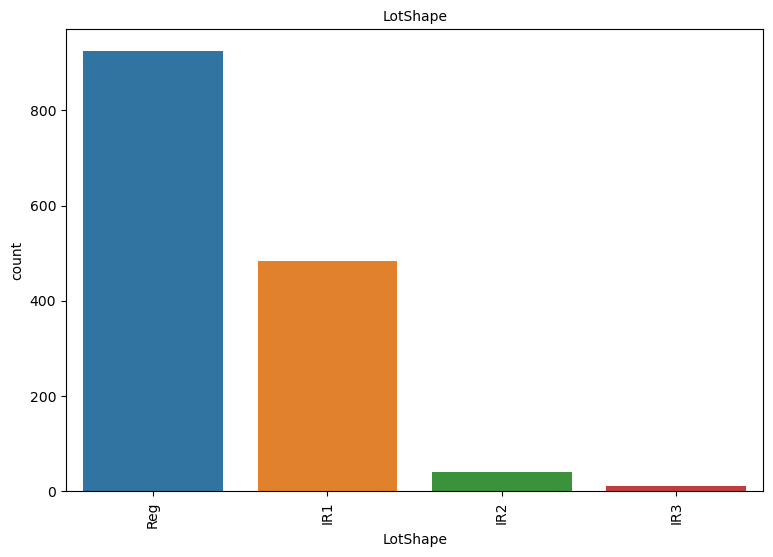

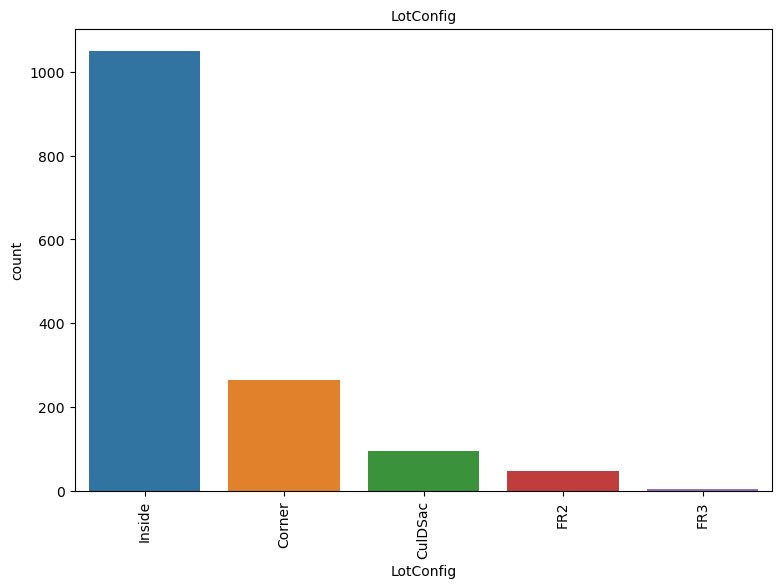

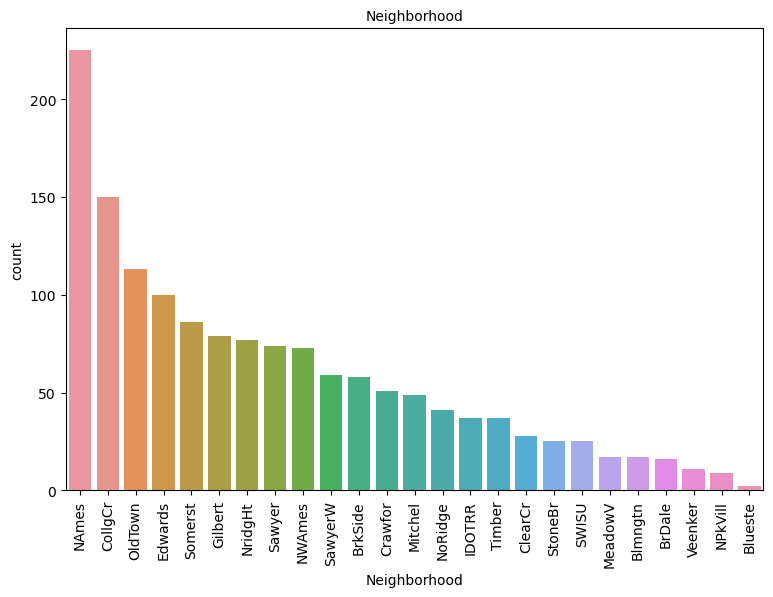

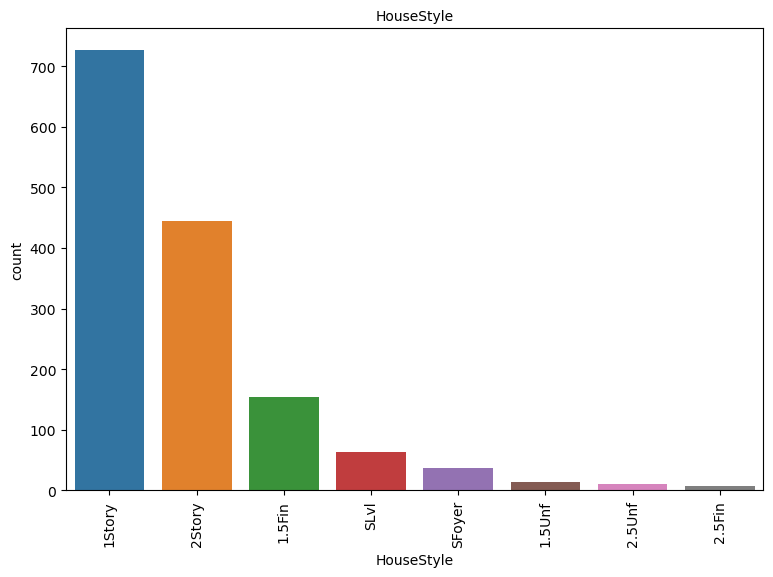

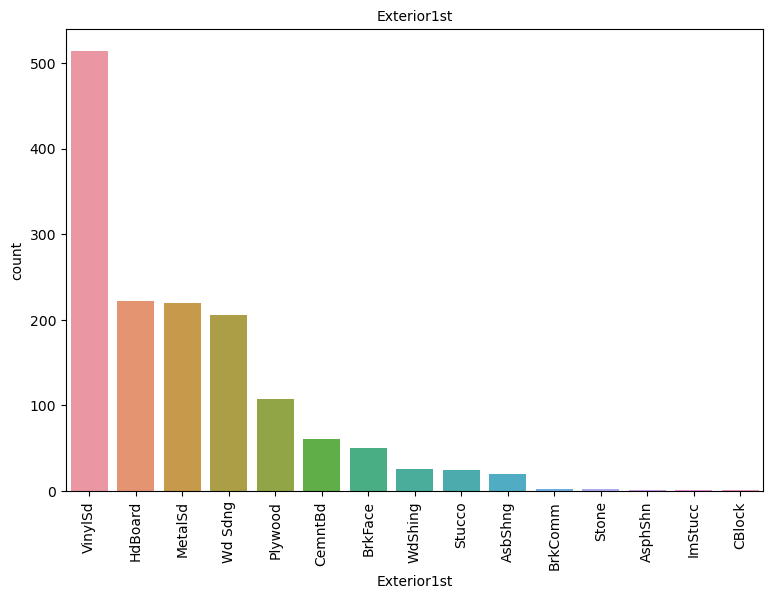

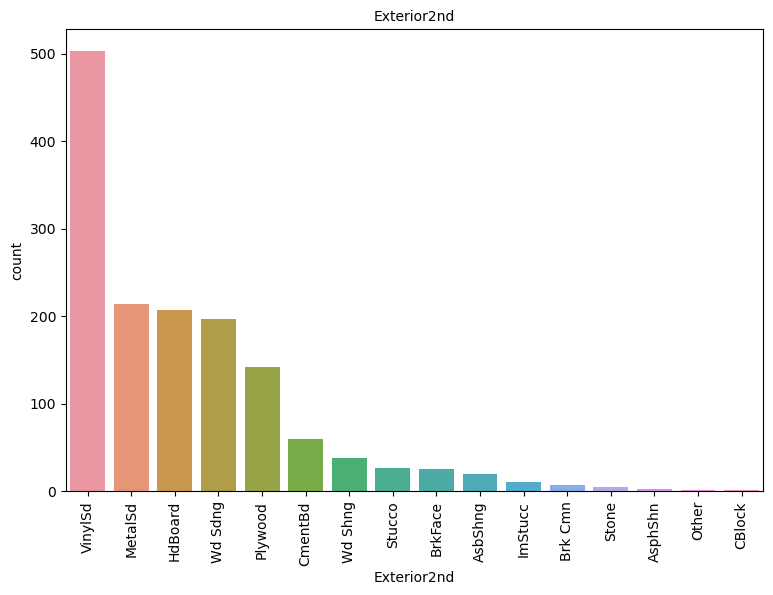

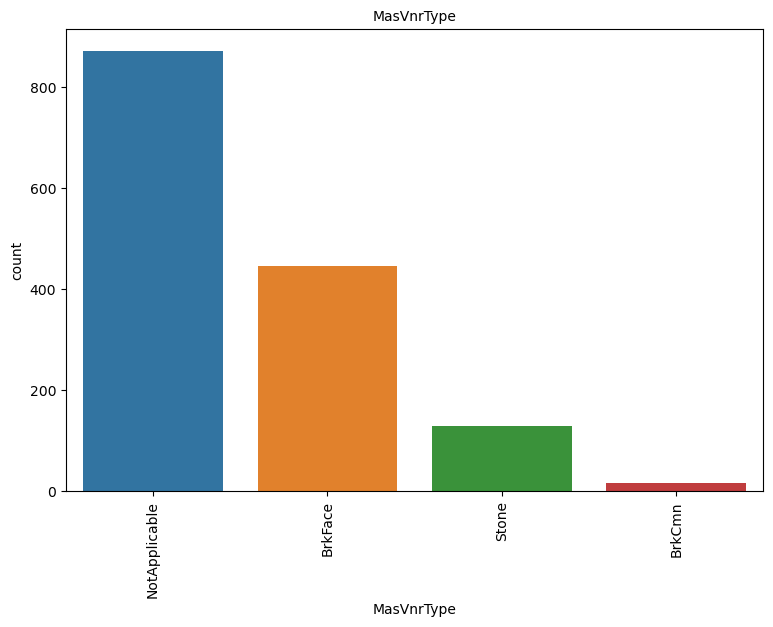

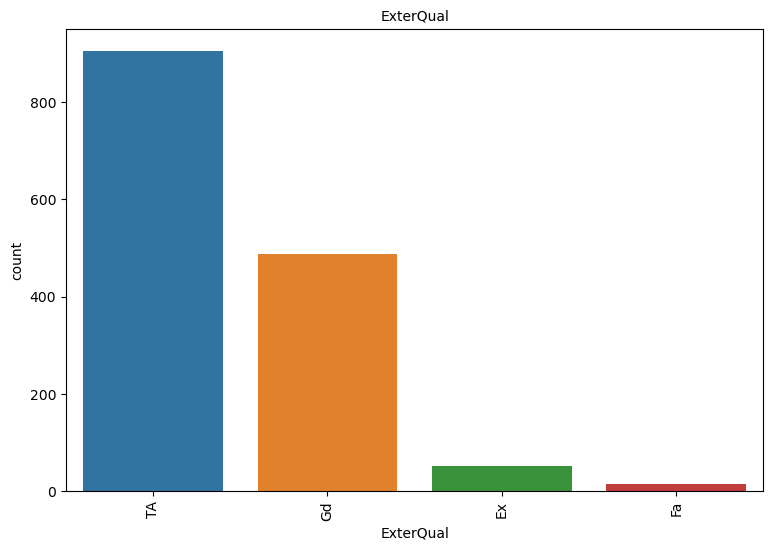

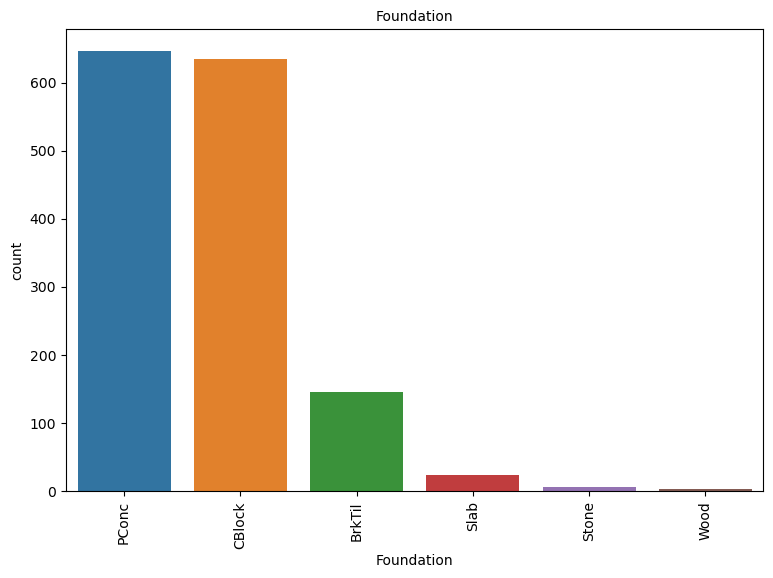

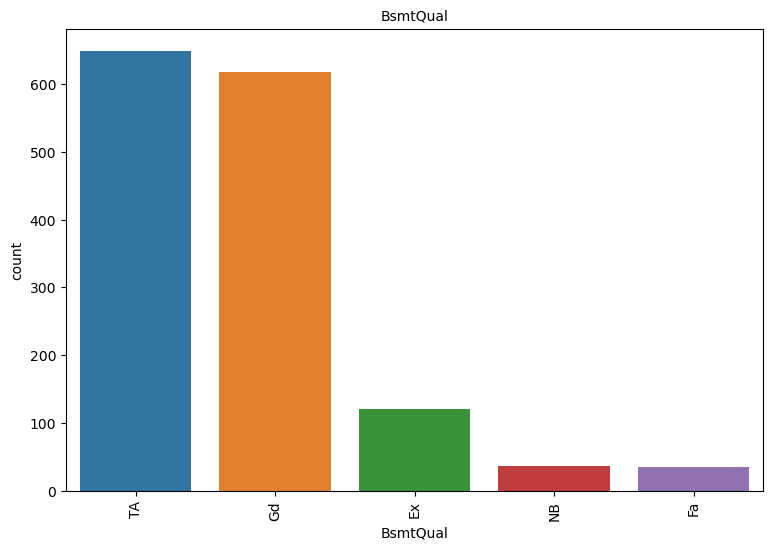

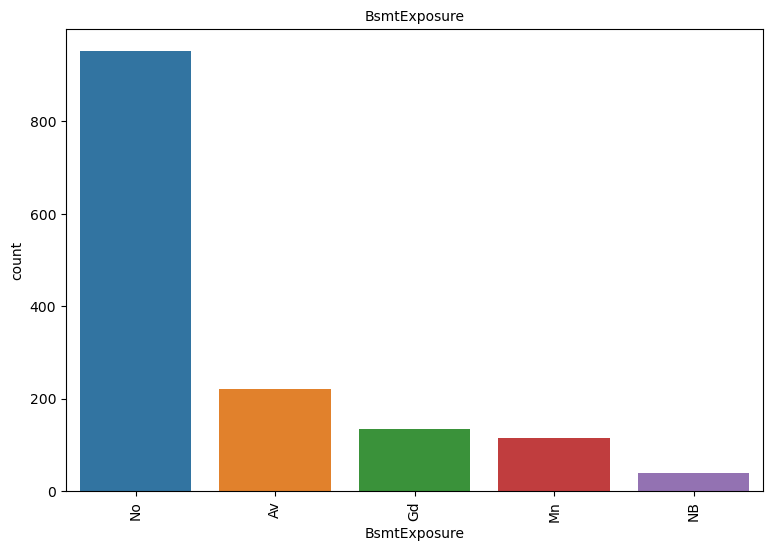

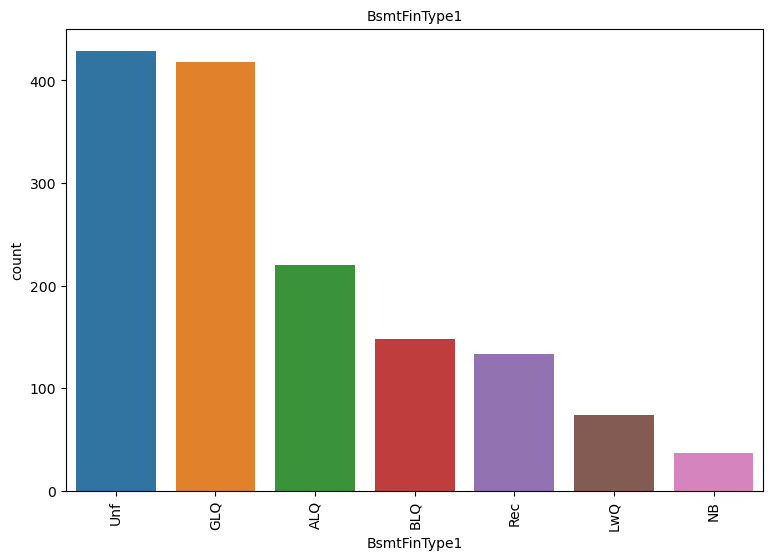

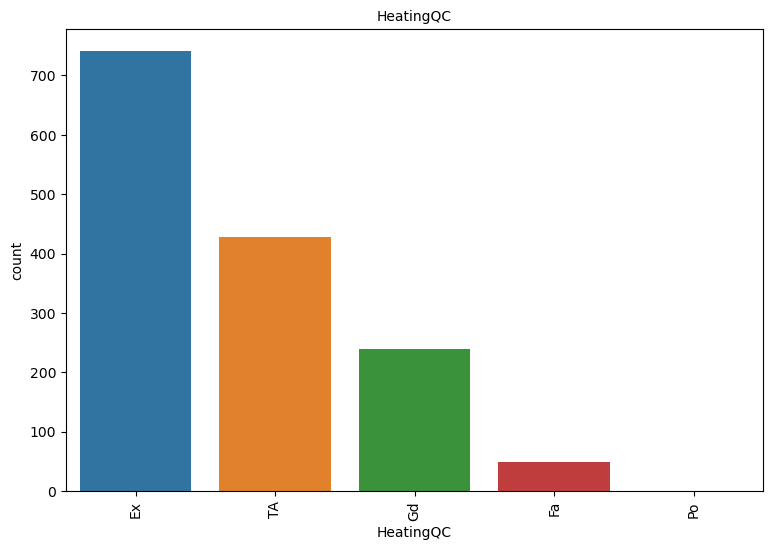

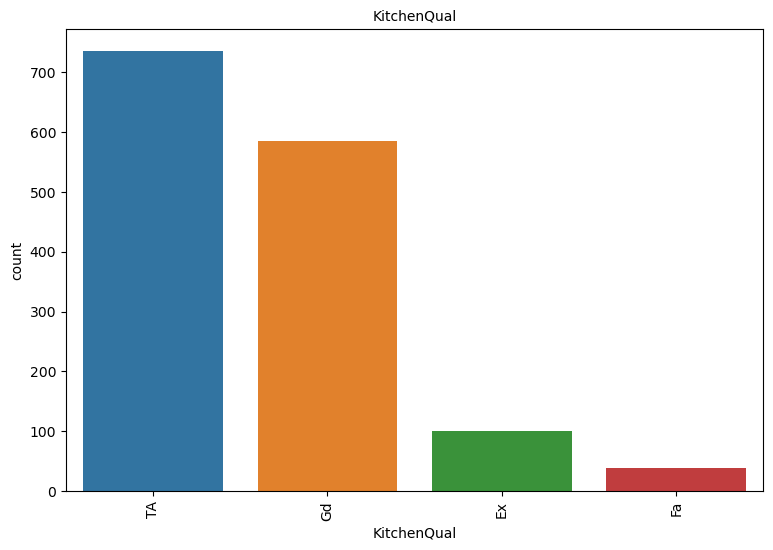

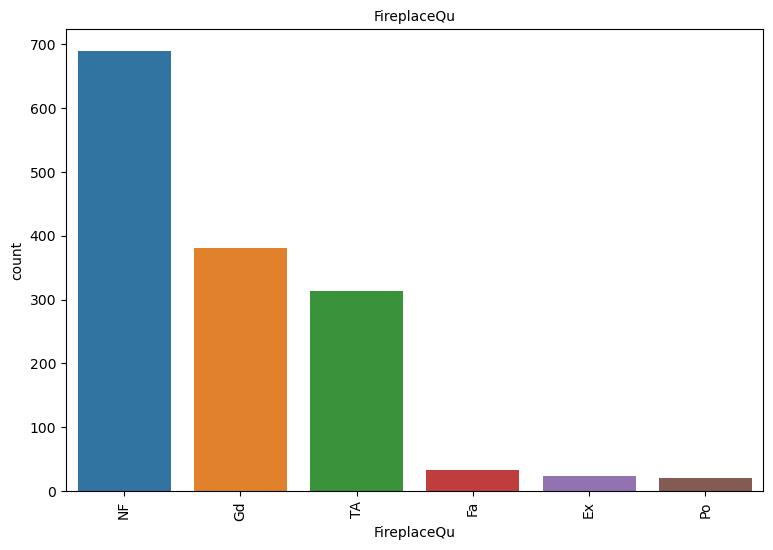

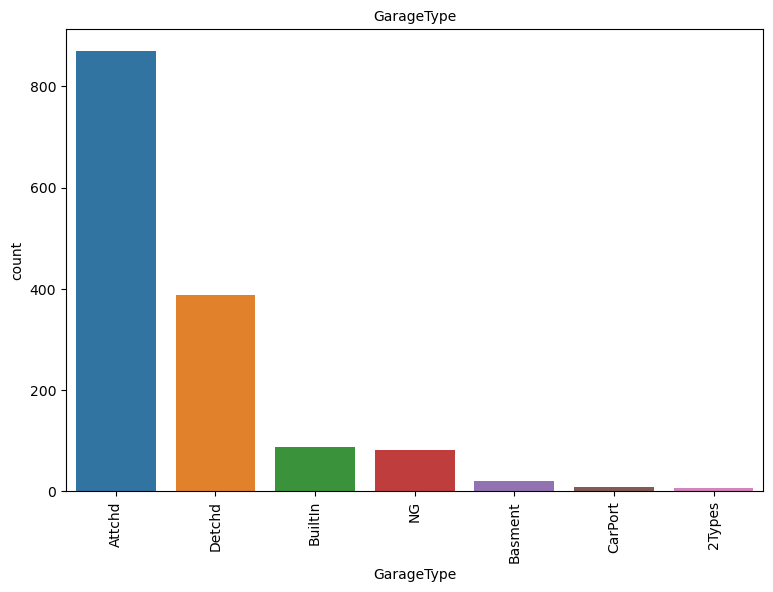

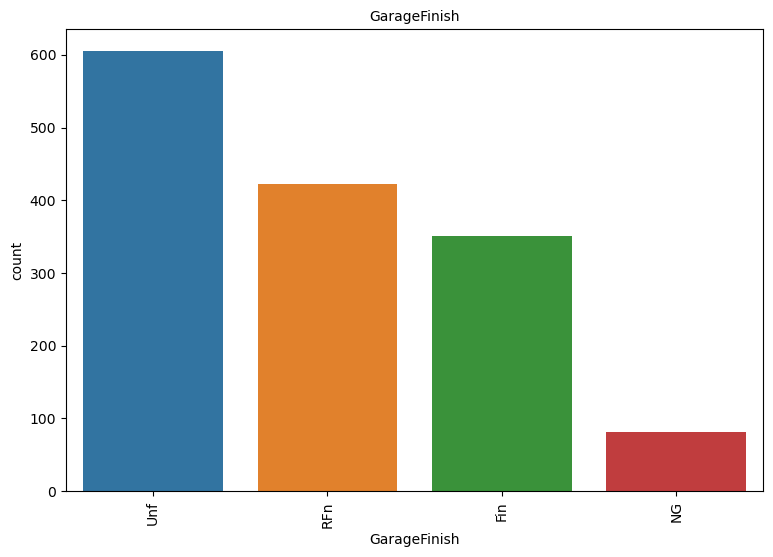

In [22]:
for col in cat_columns:
    plt.figure(figsize=(9,6))
    plt.xticks(rotation=90)
    plt.title(col, fontdict={'fontsize': 10})
    sns.barplot(x = data[col].value_counts().index, y = data[col].value_counts())
    plt.show()

We dont see much skewed data as we removed columns having 75% same values.

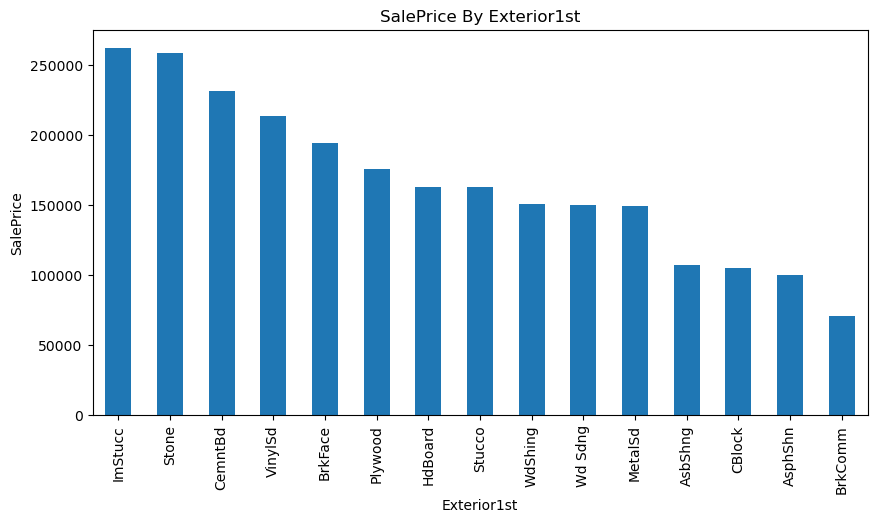

In [23]:
sum = (data['SalePrice'].groupby(data['Exterior1st']).sum()/data['Exterior1st'].value_counts()).sort_values(ascending=False)
sum.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Exterior1st')
plt.ylabel('SalePrice')
plt.title('SalePrice By Exterior1st')
plt.show()

WdShing Exterior 1st has the highest salesPrice on average.

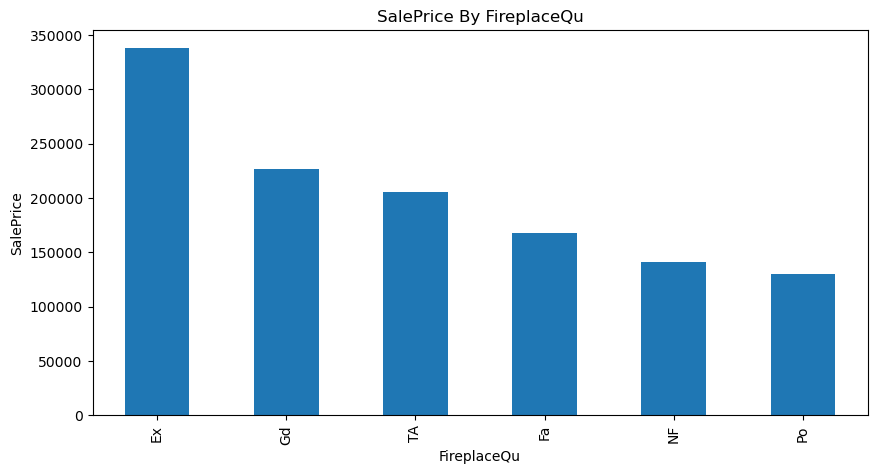

In [24]:
sum = (data['SalePrice'].groupby(data['FireplaceQu']).sum()/data['FireplaceQu'].value_counts()).sort_values(ascending=False)
sum.plot(kind='bar', figsize=(10, 5))
plt.xlabel('FireplaceQu')
plt.ylabel('SalePrice')
plt.title('SalePrice By FireplaceQu')
plt.show()

We can clearly see that the property having Excellent condition fireplace has higher salePrice in comparison to a property having Poor condition fireplace.
Also, It is better to have No Fireplace (NF), than a Fa or Po one.

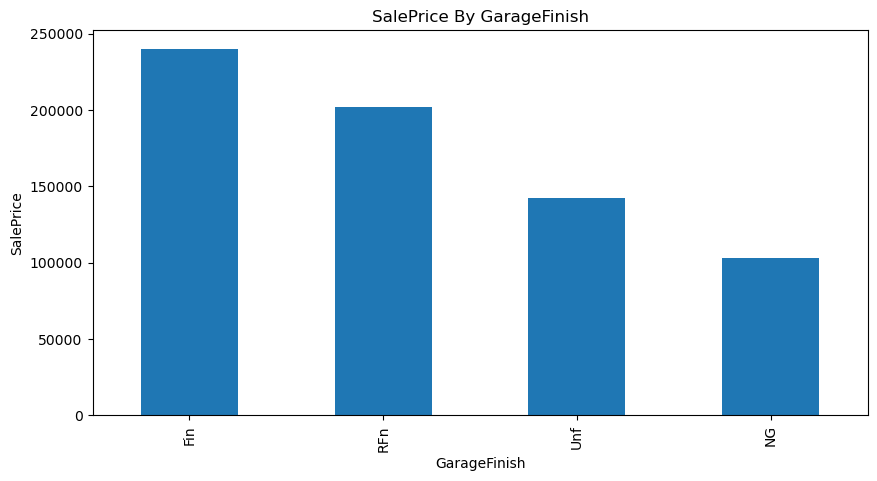

In [25]:
sum = (data['SalePrice'].groupby(data['GarageFinish']).sum()/data['GarageFinish'].value_counts()).sort_values(ascending=False)
sum.plot(kind='bar', figsize=(10, 5))
plt.xlabel('GarageFinish')
plt.ylabel('SalePrice')
plt.title('SalePrice By GarageFinish')
plt.show()

We can clearly see that the property having Fin garage has higher salePrice in comparison to a house having No Garage.

## 6. Creating Dummy Variable

In [26]:
df_dummy = pd.get_dummies(data[cat_columns], drop_first=True, dtype=int)
data.drop(cat_columns, axis=1, inplace=True)
data = pd.concat([data, df_dummy], axis=1)
data.shape

(1459, 150)

- Check Distribution of SalePrice

<Axes: xlabel='SalePrice', ylabel='Density'>

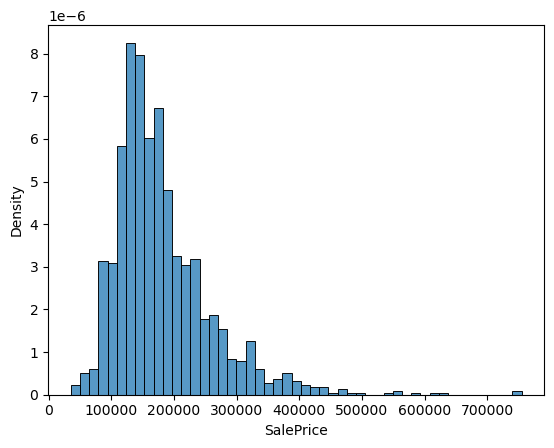

In [27]:
sns.histplot(data['SalePrice'],stat="density")

The SalePrice is skewed

In [28]:
data['SalePrice'] = np.log(data['SalePrice']) 

<Axes: xlabel='SalePrice', ylabel='Density'>

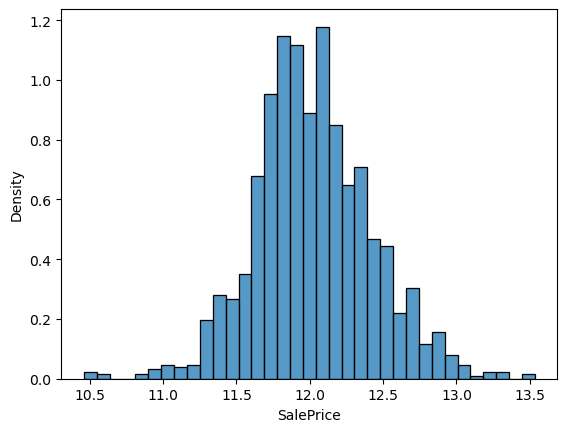

In [29]:
sns.histplot(data['SalePrice'],stat="density")

This is now Normally Distributed

## 7. Train Test Split

In [30]:
X = data.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NotApplicable,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NB,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NB,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NB,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NF,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NG,GarageFinish_NG,GarageFinish_RFn,GarageFinish_Unf
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,

In [31]:
y = data[['SalePrice']]
y.head()

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216


In [32]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=75)

In [33]:
num_columns_except_salePrice = num_columns[:-1]
num_columns_except_salePrice

array(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'], dtype=object)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[num_columns_except_salePrice] = scaler.fit_transform(X_train[num_columns_except_salePrice])
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NotApplicable,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NB,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NB,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NB,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NF,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NG,GarageFinish_NG,GarageFinish_RFn,GarageFinish_Unf
245,-0.883592,0.505518,0.009116,0.655725,-0.513487,0.564545,0.163720,-0.012666,1.111912,-0.294107,0.810014,1.906989,1.900305,-0.796751,-0.121731,0.667754,-0.832671,4.002230,0.786223,-0.748798,0.174252,-0.225200,-0.319692,0.616746,0.261886,0.308886,0.623407,0.852847,-0.146673,-0.352381,-0.114969,-0.277041,-0.069554,-0.103329,-0.148047,-1.380872,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
617,-0.297020,-0.489964,-0.341858,-0.069622,0.375107,-0.535024,-1.473668,-0.575395,-1.016668,-0.294107,0.615719,-0.550504,-0.899792,-0.796751,-0.121731,-1.322366,-0.832671,-0.241048,-1.013629,-0.748798,-1.027853,-0.225200,-1.542184,-0.938064,0.204248,0.308886,0.264457,-0.742673,-0.703059,-0.352381,-0.114969,-0.277041,-0.069554,-0.103329,-0.148047,0.146615,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
877,0.054923,0.221094,-0.164104,2.106418,-0.513487,1.081989,0.982414,0.616267,1.664105,-0.294107,-0.633321,0.977848,0.796421,0.931097,-0.121731,1.341333,1.103905,-0.241048,0.786223,1.242147,1.376358,-0.225200,2.125293,0.616746,0.297355,1.650895,1.256293,0.747559,-0.703059,-0.352381,-0.114969,-0.277041,-0.069554,-0.103329,-0.148047,0.910358,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
corr_matrix = X.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]
print(to_drop)

['Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd', 'BsmtExposure_NB', 'BsmtFinType1_NB', 'GarageType_NG', 'GarageFinish_NG']


In [37]:
X_train = X_train.drop(to_drop, axis=1)

-------------------------------------------

In [38]:
# Tranforming the test data 
X_test[num_columns_except_salePrice] = scaler.transform(X_test[num_columns_except_salePrice])
X_test = X_test.drop(to_drop, axis=1)
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NotApplicable,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NB,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NF,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf
276,-0.883592,2.828308,-0.124062,0.655725,-0.513487,1.049649,0.886097,-0.575395,-1.016668,-0.294107,2.299610,1.215592,1.060276,-0.796751,-0.121731,0.070718,-0.832671,-0.241048,0.786223,-0.748798,0.174252,-0.225200,0.291554,-0.938064,0.295138,0.308886,0.476993,0.067236,1.436887,-0.352381,-0.114969,-0.277041,-0.069554,-0.103329,-0.887197,1.674101,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
570,0.758809,0.221094,0.307880,-0.794969,-0.513487,-0.179281,-0.943925,0.020436,-0.487387,-0.294107,2.153888,1.623152,1.512599,-0.796751,-0.121731,0.392199,-0.832671,-0.241048,0.786223,-0.748798,3.780568,4.113083,2.125293,-0.938064,0.259669,0.308886,0.491162,-0.742673,-0.703059,-0.352381,-0.114969,-0.277041,-0.069554,-0.103329,1.699828,0.146615,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
317,0.054923,0.268498,-0.145742,1.381071,-0.513487,1.146670,1.030572,-0.575395,-1.016668,-0.294107,1.207856,0.070540,-0.210537,1.178256,-0.121731,0.834235,-0.832671,-0.241048,0.786223,1.242147,0.174252,-0.225200,0.902800,0.616746,0.301789,1.650895,2.611801,0.941937,-0.046809,-0.352381,-0.114969,-0.277041,-0.069554,-0.103329,2.069403,-0.617129,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
1303,-0.883592,0.173690,-0.180253,0.655725,-0.513487,1.114330,

### Ridge regression

In [39]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# no of cross validations
folds = 5

ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)

ridge_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [40]:
# Check the results for ridge
cv_results = pd.DataFrame(ridge_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.020401,0.006431,0.010943,0.001134,0.0001,{'alpha': 0.0001},0.864173,0.833869,0.922355,0.924373,0.854988,0.879952,0.036789,26,0.924993,0.930578,0.915528,0.915291,0.930031,0.923284,0.006718
1,0.019026,0.001330,0.010134,0.001833,0.001,{'alpha': 0.001},0.864184,0.833876,0.922351,0.924384,0.855000,0.879959,0.036786,25,0.924993,0.930578,0.915528,0.915291,0.930031,0.923284,0.006718
2,0.019638,0.002780,0.010862,0.001752,0.01,{'alpha': 0.01},0.864297,0.833939,0.922319,0.924487,0.855116,0.880032,0.036763,24,0.924993,0.930578,0.915527,0.915290,0.930030,0.923284,0.006719
3,0.026166,0.005006,0.015229,0.003717,0.05,{'alpha': 0.05},0.864761,0.834204,0.922171,0.924873,0.855573,0.880316,0.036654,23,0.924982,0.930564,0.915511,0.915270,0.930007,0.923267,0.006719
4,0.029999,0.003734,0.015539,0.002455,0.1,{'alpha': 0.1},0.865282,0.834500,0.922016,0.925241,0.856043,0.880616,0.036527,21,0.924956,0.930530,0.915476,0.915224,0.929954,0.923228,0.006719
5,0.021483,0.008908,0.010648,0.004241,0.2,{'alpha': 0.2},0.866188,0.835010,0.921816,0.925777,0.856762,0.881111,0.036312,20,0.924883,0.930433,0.915390,0.915105,0.929808,0.923124,0.006713
6,0.029363,0.002933,0.019786,0.005272,0.3,{'alpha': 0.3},0.866974,0.835440,0.921713,0.926176,0.857296,0.881520,0.036143,19,0.924798,0.930321,0.915300,0.914976,0.929648,0.923009,0.006704
7,0.027475,0.003029,0.016241,0.001419,0.4,{'alpha': 0.4},0.867675,0.835812,0.921663,0.926499,0.857710,0.881872,0.036005,18,0.924707,0.930207,0.915210,0.914848,0.929486,0.922892,0.006693
8,0.021193,0.002772,0.012528,0.001930,0.5,{'alpha': 0.5},0.868311,0.836139,0.921644,0.926772,0.858042,0.882182,0.035890,17,0.924615,0.930092,0.915121,0.914723,0.929329,0.922776,0.006683
9,0.013653,0.003691,0.009172,0.003128,0.6,{'alpha': 0.6},0.868895,0.836430,0.921643,0.927010,0.858311,0.882458,0.035793,16,0.924522,0.929980,0.915032,0.914601,0.929177,0.922662,0.006673


In [41]:
## View the optimal value of alpha
best_alpha_ridge = ridge_cv.best_params_['alpha']
print(f"Best Alpha: {best_alpha_ridge}")
best_r2_score_ridge = ridge_cv.best_score_
print(f"Best R2-Score: {best_r2_score_ridge}")

Best Alpha: 7.0
Best R2-Score: 0.8859329318908044


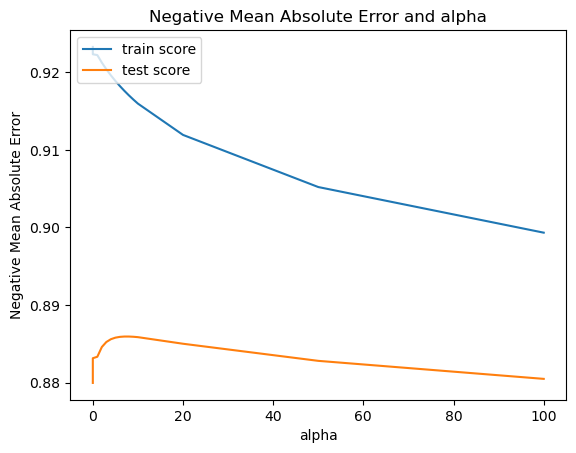

In [42]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [43]:
alpha = 7
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=7)

In [44]:
# View coefficients for each parameter
import numpy


model_parameters_ridge = list(sorted(ridge.coef_))
model_parameters_ridge.insert(0, ridge.intercept_)
model_parameters_ridge = [numpy.round(x, 5) for x in model_parameters_ridge]
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters_ridge = list((zip(cols, model_parameters_ridge)))

In [45]:
## Define a function for checking multiple metrics for each model 
def show_metrics(y_train, y_train_pred, y_test, y_pred):
    
    ## Create a list to save all metrics (will be used in creating a final summary in the end)
    metric = {}
    
    ## R-squared of train and test data
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric["R-Squared (Train)"] = r2_score(y_train, y_train_pred)
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metric["R-Squared (Test)"] = r2_score(y_test, y_pred)
    
    ## Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric["RSS (Train)"] = rss_train
    rss_test = np.sum(np.square(y_test - y_pred))
    metric["RSS (Test)"] = rss_test
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
    
    
    ## Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric["MSE (Train)"] = mse_train
    mse_test = mean_squared_error(y_test, y_pred)
    metric["MSE (Test)"] = mse_test
    
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)
    
    # Root Mean Squared Error for train and test datass
    rmse_train = mse_train**0.5
    metric["RMSE (Train)"] = rmse_train
    rmse_test = mse_test**0.5
    metric["RMSE (Test)"] = rmse_test
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test) 
    

    return metric

In [46]:
#Predictions on training data
ridge_y_train_pred = ridge.predict(X_train)
ridge_y_pred = ridge.predict(X_test)

In [47]:
# Check the metrics for the train and test data
ridge_metrics = show_metrics(y_train, ridge_y_train_pred, y_test, ridge_y_pred)

R-Squared (Train) = 0.92
R-Squared (Test) = 0.81
RSS (Train) = 13.88
RSS (Test) = 12.85
MSE (Train) = 0.01
MSE (Test) = 0.03
RMSE (Train) = 0.12
RMSE (Test) = 0.17


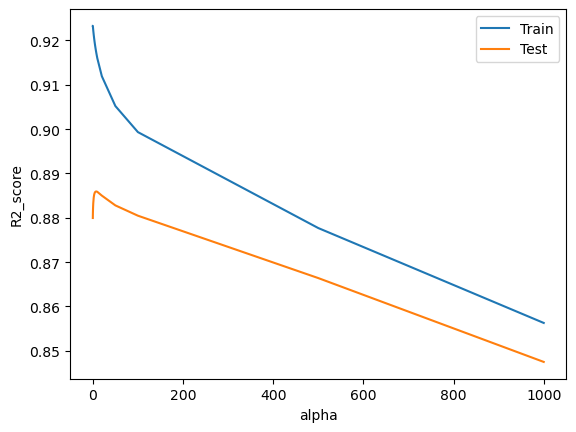

In [48]:
## Plotting R2 score vs alpha values
ridgeCV_results= pd.DataFrame(ridge_cv.cv_results_)
ridgeCV_results
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.legend()
plt.show()

##### Optimal Value of Alpha comes out to be 7

### Lasso regression


In [49]:
# alphas for lasso regression
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

folds = 5
# Cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lasso_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [50]:
# View the optimal value of alpha
lasso_cv.best_params_

{'alpha': 0.001}

In [51]:
# View the optimal value of alpha
lasso_cv_results = pd.DataFrame(lasso_cv.cv_results_)
lasso_cv_results = cv_results[cv_results['param_alpha']<=100]
lasso_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.020401,0.006431,0.010943,0.001134,0,{'alpha': 0.0001},0.864173,0.833869,0.922355,0.924373,0.854988,0.879952,0.036789,26,0.924993,0.930578,0.915528,0.915291,0.930031,0.923284,0.006718
1,0.019026,0.001330,0.010134,0.001833,0,{'alpha': 0.001},0.864184,0.833876,0.922351,0.924384,0.855000,0.879959,0.036786,25,0.924993,0.930578,0.915528,0.915291,0.930031,0.923284,0.006718
2,0.019638,0.002780,0.010862,0.001752,0,{'alpha': 0.01},0.864297,0.833939,0.922319,0.924487,0.855116,0.880032,0.036763,24,0.924993,0.930578,0.915527,0.915290,0.930030,0.923284,0.006719
3,0.026166,0.005006,0.015229,0.003717,0,{'alpha': 0.05},0.864761,0.834204,0.922171,0.924873,0.855573,0.880316,0.036654,23,0.924982,0.930564,0.915511,0.915270,0.930007,0.923267,0.006719
4,0.029999,0.003734,0.015539,0.002455,0,{'alpha': 0.1},0.865282,0.834500,0.922016,0.925241,0.856043,0.880616,0.036527,21,0.924956,0.930530,0.915476,0.915224,0.929954,0.923228,0.006719
5,0.021483,0.008908,0.010648,0.004241,0,{'alpha': 0.2},0.866188,0.835010,0.921816,0.925777,0.856762,0.881111,0.036312,20,0.924883,0.930433,0.915390,0.915105,0.929808,0.923124,0.006713
6,0.029363,0.002933,0.019786,0.005272,0,{'alpha': 0.3},0.866974,0.835440,0.921713,0.926176,0.857296,0.881520,0.036143,19,0.924798,0.930321,0.915300,0.914976,0.929648,0.923009,0.006704
7,0.027475,0.003029,0.016241,0.001419,0,{'alpha': 0.4},0.867675,0.835812,0.921663,0.926499,0.857710,0.881872,0.036005,18,0.924707,0.930207,0.915210,0.914848,0.929486,0.922892,0.006693
8,0.021193,0.002772,0.012528,0.001930,0,{'alpha': 0.5},0.868311,0.836139,0.921644,0.926772,0.858042,0.882182,0.035890,17,0.924615,0.930092,0.915121,0.914723,0.929329,0.922776,0.006683
9,0.013653,0.003691,0.009172,0.003128,0,{'alpha': 0.6},0.868895,0.836430,0.921643,0.927010,0.858311,0.882458,0.035793,16,0.924522,0.929980,0.915032,0.914601,0.929177,0.922662,0.006673


In [52]:
# Create a ridge regression instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.001)

In [53]:
# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [54]:
# Predicting values for test and train 
lasso_y_train_pred = lasso.predict(X_train)
lasso_y_pred = lasso.predict(X_test)

In [55]:
lasso_y_pred

array([12.22853725, 11.92143404, 12.51853625, 12.33917576, 11.08115586,
       12.69849805, 11.84365849, 11.80376905, 11.81696116, 10.91553412,
       12.29227501, 11.92383786, 11.9019086 , 11.31842112, 12.38924713,
       12.14283662, 11.96906502, 12.09017314, 12.08010731, 11.81238087,
       12.96983182, 11.80846155, 12.10065153, 11.69325391, 12.14788584,
       11.80943396, 11.89091787, 11.4480059 , 14.63049083, 12.67097237,
       12.09832741, 12.9239415 , 12.15867235, 12.03784729, 12.07872879,
       11.68275187, 11.63771962, 11.87866956, 12.52857561, 11.87818102,
       11.68962024, 12.50324542, 12.27466471, 11.56803909, 11.86691323,
       12.12669954, 11.93849348, 12.12305038, 12.29225349, 12.57390012,
       12.68084171, 11.43168228, 12.09854458, 12.16468656, 11.95944373,
       12.59517578, 11.88711571, 12.18739916, 12.15470278, 12.28730741,
       12.09964336, 12.0691937 , 11.66805742, 12.11777247, 12.10204898,
       11.87654487, 11.93709254, 12.05907315, 12.67585431, 11.79

In [56]:
lasso_y_pred= lasso_y_pred.reshape(438,1)
lasso_y_train_pred= lasso_y_train_pred.reshape(1021,1)

In [57]:
# Checking the mtrics for train and test data
lasso_metrics = show_metrics(y_train, lasso_y_train_pred, y_test, lasso_y_pred)

R-Squared (Train) = 0.91
R-Squared (Test) = 0.81
RSS (Train) = 15.08
RSS (Test) = 13.45
MSE (Train) = 0.01
MSE (Test) = 0.03
RMSE (Train) = 0.12
RMSE (Test) = 0.18


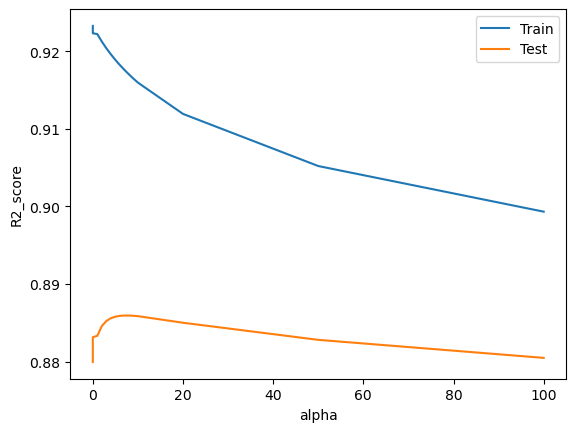

In [58]:
# Checking R2 and alpha score.
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'], label='Train')
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.legend()
plt.show()

##### Observation : 
- With the increase in alpha values the error on train set is decreaing
##### Optimal Value of Alpha comes out to be  0.001

In [59]:
# lasso model parameters
lasso_model_parameters = list(sorted(lasso.coef_))
lasso_model_parameters.insert(0, lasso.intercept_)
lasso_model_parameters = [numpy.round(x, 3) for x in lasso_model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_model_parameters = list((zip(cols, lasso_model_parameters)))
lasso_model_parameters

[('constant', array([12.038])),
 ('MSSubClass', -0.138),
 ('LotFrontage', -0.067),
 ('LotArea', -0.058),
 ('OverallQual', -0.05),
 ('OverallCond', -0.037),
 ('YearBuilt', -0.02),
 ('YearRemodAdd', -0.018),
 ('MasVnrArea', -0.015),
 ('BsmtFinSF1', -0.013),
 ('BsmtFinSF2', -0.011),
 ('BsmtUnfSF', -0.01),
 ('TotalBsmtSF', -0.007),
 ('1stFlrSF', -0.006),
 ('2ndFlrSF', -0.005),
 ('LowQualFinSF', -0.005),
 ('GrLivArea', -0.005),
 ('BsmtFullBath', -0.005),
 ('BsmtHalfBath', -0.004),
 ('FullBath', -0.004),
 ('HalfBath', -0.003),
 ('BedroomAbvGr', -0.002),
 ('KitchenAbvGr', -0.001),
 ('TotRmsAbvGrd', -0.001),
 ('Fireplaces', -0.0),
 ('GarageYrBlt', -0.0),
 ('GarageCars', -0.0),
 ('GarageArea', 0.0),
 ('WoodDeckSF', -0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', -0.0),
 ('PoolArea', -0.0),
 ('MiscVal', -0.0),
 ('MoSold', -0.0),
 ('YrSold', 0.0),
 ('LotShape_IR2', -0.0),
 ('LotShape_IR3', 0.0),
 ('LotShape_Reg', 0.0),
 ('LotConfig_CulDSac', -0.0),
 ('

### Residual analysis

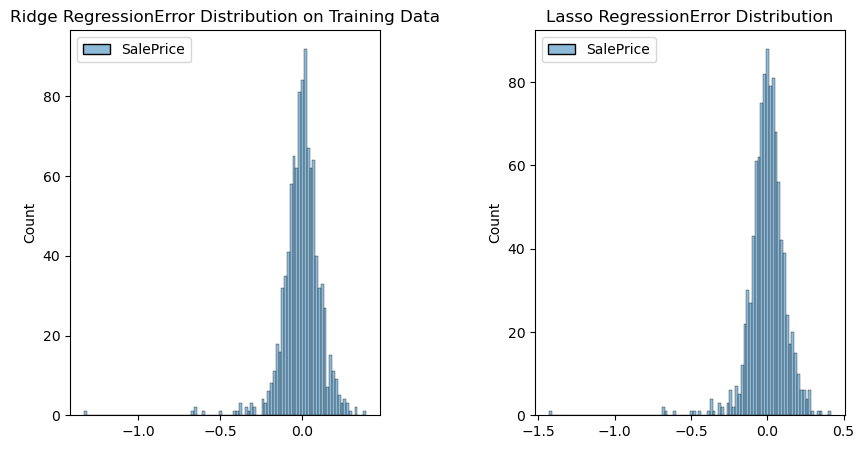

In [65]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.histplot((y_train - ridge_y_train_pred), bins = 100)
plt.title('Ridge RegressionError Distribution on Training Data')

plt.subplot(1, 2, 2)
sns.histplot((y_train - lasso_y_train_pred), bins = 100)
plt.title('Lasso RegressionError Distribution')

plt.subplots_adjust(wspace = .5)

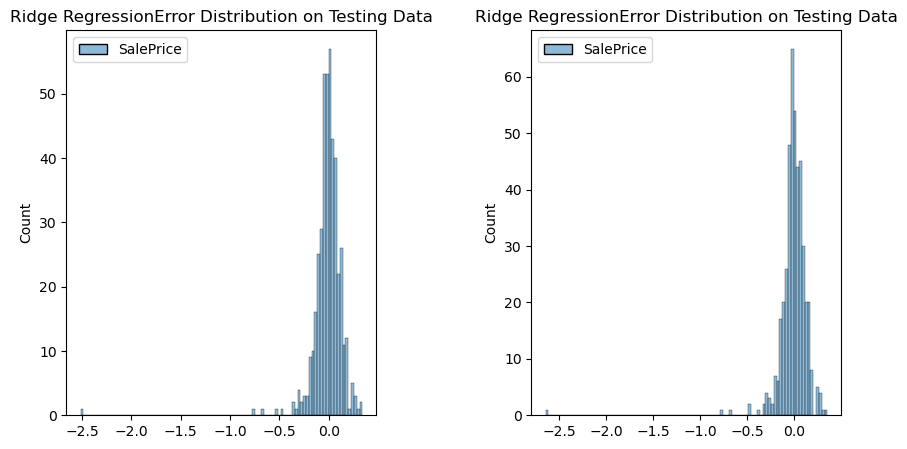

In [64]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.histplot((y_test - ridge_y_pred), bins = 100)
plt.title('Ridge RegressionError Distribution on Testing Data')

plt.subplot(1, 2, 2)
sns.histplot((y_test - lasso_y_pred), bins = 100)
plt.title('Ridge RegressionError Distribution on Testing Data')

plt.subplots_adjust(wspace = .5)

In [62]:
# All metrics for both models
ridgeMetricsDF = pd.DataFrame.from_dict(ridge_metrics, orient='index', columns=['Ridge'])
lassoMetricsDF = pd.DataFrame.from_dict(lasso_metrics, orient='index', columns=['Lasso'])
finalMetrics = ridgeMetricsDF.join(lassoMetricsDF)
finalMetrics

,Ridge,Lasso
R-Squared (Train),0.915256,0.907935
R-Squared (Test),0.813635,0.805016
RSS (Train),SalePrice 13.883899 dtype: float64,SalePrice 15.083428 dtype: float64
RSS (Test),SalePrice 12.852223 dtype: float64,SalePrice 13.446649 dtype: float64
MSE (Train),0.013598,0.014773
MSE (Test),0.029343,0.0307
RMSE (Train),0.116612,0.121545
RMSE (Test),0.171298,0.175214


In [67]:
lasso_model_parameters.sort(key = lambda x: abs(x[1]), reverse=True)
lasso_model_parameters

[('constant', array([12.038])),
 ('MSSubClass', -0.138),
 ('GarageType_Attchd', 0.1),
 ('FireplaceQu_TA', 0.096),
 ('FireplaceQu_Po', 0.092),
 ('FireplaceQu_NF', 0.09),
 ('LotFrontage', -0.067),
 ('FireplaceQu_Gd', 0.061),
 ('LotArea', -0.058),
 ('FireplaceQu_Fa', 0.053),
 ('OverallQual', -0.05),
 ('KitchenQual_TA', 0.05),
 ('KitchenQual_Fa', 0.041),
 ('KitchenQual_Gd', 0.041),
 ('HeatingQC_TA', 0.04),
 ('OverallCond', -0.037),
 ('HeatingQC_Po', 0.037),
 ('HeatingQC_Gd', 0.034),
 ('HeatingQC_Fa', 0.031),
 ('BsmtFinType1_Rec', 0.026),
 ('BsmtFinType1_Unf', 0.026),
 ('BsmtFinType1_NB', 0.022),
 ('YearBuilt', -0.02),
 ('YearRemodAdd', -0.018),
 ('BsmtFinType1_BLQ', 0.018),
 ('BsmtFinType1_GLQ', 0.018),
 ('BsmtFinType1_LwQ', 0.018),
 ('BsmtExposure_No', 0.017),
 ('BsmtExposure_NB', 0.016),
 ('MasVnrArea', -0.015),
 ('BsmtFinSF1', -0.013),
 ('BsmtQual_TA', 0.013),
 ('BsmtExposure_Gd', 0.013),
 ('BsmtExposure_Mn', 0.013),
 ('BsmtFinSF2', -0.011),
 ('BsmtQual_Gd', 0.011),
 ('BsmtQual_NB', 0.0